# Continuous Optimization

Tentokrát použijeme knihovnu `deap` library pro implementaci evolučního algoritmu pro 1) spojitou optimalizaci a 2) kombinatorickou optimalizaci. Hlavní výhoda `deap`u je, že spoustu genetických operátorů pro tyto problémy je tam naimplementováno.

Začneme se spojitou optimalizací a navrhneme algoritmus, který optimalizuje (hledá min.) zadanou funkci - pro nás tzv. [Rastrigin funkce](https://en.wikipedia.org/wiki/Rastrigin_function), často používaná pro vyhodnocení optimalizačních algoritmů.

Taková funkce by se např. pomocí gradient descentu optimalizovala *velmi* špatně, protože má spoustu lokálních optim. Stejně tak by činili problémy sedlové body. Evoluční algoritmy se pro tento typ problémů skvěle hodí.

In [1]:
import random

from deap import base
from deap import creator
from deap import tools

IND_DIM = 20
LOWER_BOUND = -5.12
UPPER_BOUND = 5.12

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))     # fitness for minimization - notice the negative weight
creator.create("Individual", list, fitness=creator.FitnessMin)  # create class for individuals - derived from list and uses the fitness defined above

toolbox = base.Toolbox()
toolbox.register("attr_val", random.uniform, LOWER_BOUND, UPPER_BOUND)             # generates a single random number between 0 and 1
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_val, IND_DIM)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Podíváme se, jak fungují metody z toolboxu:

In [2]:
print("attr_val:", toolbox.attr_val())
print("individual:", toolbox.individual()[:5]) # plot first 5 elements of the individual
print("individual length: ", len(toolbox.individual()))
print()
print("population(5):", toolbox.population(5))  # list of lists

attr_val: 4.582811182484689
individual: [-0.3736382439316932, 4.869394348939568, 2.659806769539454, -1.6207804204265766, 3.160824604370492]
individual length:  20

population(5): [[3.0453554185302965, -3.1757856591069027, 1.8581180703649833, -2.4262375483915513, -0.512105022829469, -4.0579477199203255, -1.7746567231294432, 1.970598636843599, 2.074440579250858, 1.277261367407223, 0.8214613314393127, -2.878680787817988, 4.214454636931303, -2.56356795426094, -2.2786424178969535, 4.79348105747282, 1.8568609721008809, -4.371242593516585, 0.5970119283053403, -0.34616792680728814], [-1.3905768564877268, -1.6372424247975905, 3.0605757309991324, 1.1320555576585356, 1.3345101896814358, -0.9246858016659152, -2.0829476318444167, -4.101883184437773, -1.0471556977970815, 1.753087973454444, -2.6001595900519567, 1.3619123507540767, -1.154014570251492, -4.961827919709188, 2.671568460250187, 2.180039730737426, 2.3684021829265633, 0.34049578606209785, -0.8482087383830965, 1.61621824019982], [-3.376475462

Nyní si zadefinujeme genetické operátory:

In [4]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=2)

...a fitness funkci

In [6]:
import math
def rastrigin(ind):
    return 10*len(ind) + sum([(x**2 - 10 * math.cos(2 * math.pi * x)) for x in ind]),

toolbox.register("evaluate", rastrigin)

Dáme všechno dohromady a spustíme evoluci

In [9]:
from deap import algorithms
import numpy as np

s = tools.Statistics(lambda x: x.fitness.values[0])
s.register("mean", np.mean)
s.register("max", max)
s.register("min", min)

hof = tools.HallOfFame(1)  # best individual

cxpb = 0.8
mutpb = 0.2

pop = toolbox.population(100)
pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu=100, lambda_=100, cxpb=cxpb, mutpb=mutpb, ngen=500, stats=s, halloffame=hof, verbose=False)

print(hof, hof[0].fitness.values[0])

[[0.0008089145083495957, -0.992457216482603, -0.9940609895032952, -0.006075619131771359, -1.9900548597796228, -2.986720508091607, -0.99672136198589, -1.9925181925248612, 0.001022025217669609, 0.0002308026847227876, 0.99302147277469, -2.9816863109641454, -1.9882923641185437, -0.9940358337318982, -2.9834317318790937, 1.9895877803174236, -1.997970481038191, -2.984445452999534, -1.9893438516386948, -0.9939777599697934]] 65.69586093961917


### Side quest 1
- plot min/max/mean fitness values using `log` and matplotlib

## Task 1
- Zkuste si pohrát s parametry algoritmu (popřípadě pozměňte algoritmus) tak, abyste se přiblížili optimálnímu řešení.
- Pro přehled možných genetických operátorů/variant genetických algorimů se podívejte do dokumentace k `deap`u.
- Můžete to zkoušet zde, anebo pomocí python filu v repu

Optimum funkce by mělo být 0 a nejlepší jedinec by měl mít samé 0.

Níže jsou příklady kódu jak zaznamenávat výsledky pro různá nastavení. Dobré je si parametry, které měním, zadefinovat jako proměnné, pak je můžu zapisovat do dictu nebo listu

In [ ]:
# Example 1 how to track results in a jupyter ntb
# (be careful to not overwrite results! Define them somewhere at the top of the file)
results = {}

# one result per setting
results[f"cxpb-{cxpb}_mutpb-{mutpb}"] = hof[0].fitness.values[0]

In [ ]:
# Example 2 how to track results in a jupyter ntb

results = []

# **** do EA here, log results ****
results.append({'seed': random_seed, "cxpb": cxpb, "mutpb": mutpb, "result": result})

# I can also create a pandas dataframe and save it to csv!
import pandas as pd

results = pd.DataFrame(results)
results.to_csv('res.csv')

In [ ]:
# illustration how to log function choices
cx_zoo = {"twopoint": tools.cxTwoPoint, "dummy": lambda x, y: x}

toolbox.register("mate", cxzoo["twopoint"])

# then in logging...
# results.append({'cx': 'twopoint', "result": result})

In [10]:
# results processing from python files

import os
import json
import pandas as pd

os.listdir('results')

['cx_0.1.json', 'cx_0.5.json', 'cx_0.25.json', 'cx_0.7.json']

In [11]:
run_df = []

for fname in os.listdir('results'):
    with open(os.path.join('results', fname), 'r') as f:
        run_data = json.load(f)
    
    name = os.path.splitext(fname)[0]
    run_data = {'name': name, **run_data}  # so that name is the first column
    run_df.append(run_data)
    
run_df = pd.DataFrame(run_df)
run_df

,name,pop_size,cxpb,result
0,cx_0.1,100,0.10,81.652314
1,cx_0.5,100,0.50,47.793220
2,cx_0.25,100,0.25,107.494415
3,cx_0.7,100,0.70,64.683693


# Kombinatorická optimalizace (Travelling Salesman Problem)

Nyní použijeme EA pro vyřešení problému obchodního cestujícího (z anglického názvu - TSP).
Opět použijeme `deap`. 

Nejdřív vygenerujeme náhodně body v rovině, pak budeme hledat nejkratší cyklus, který je navštíví.

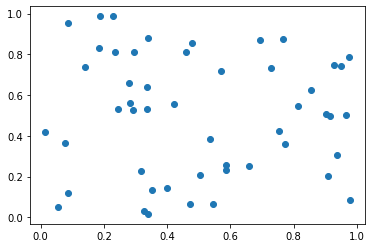

In [19]:
NUM_CITIES = 50

points = np.random.uniform(size=(NUM_CITIES, 2))

import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1])

creator.create("FitnessMinTSP", base.Fitness, weights=(-1.0,))     # fitness for minimization - notice the negative weight
creator.create("IndividualTSP", list, fitness=creator.FitnessMinTSP)  # create class for individuals - derived from list and uses the fitness defined above

toolboxTSP = base.Toolbox()
toolboxTSP.register("indices", random.sample, range(NUM_CITIES), NUM_CITIES)
toolboxTSP.register("individual", tools.initIterate, creator.Individual, toolboxTSP.indices) # initIterate can be used to initialize individual from any iterable object
toolboxTSP.register("population", tools.initRepeat, list, toolboxTSP.individual)

Zase se podíváme na funkce v toolboxu:

In [20]:
print("indices:", toolboxTSP.indices())
print("individual:", toolboxTSP.individual())

indices: [48, 23, 20, 2, 49, 19, 21, 27, 35, 3, 13, 14, 17, 30, 29, 5, 40, 32, 0, 7, 12, 10, 16, 44, 42, 6, 18, 28, 33, 31, 34, 43, 37, 1, 4, 9, 11, 25, 47, 38, 15, 8, 22, 46, 24, 26, 36, 45, 39, 41]
individual: [10, 11, 48, 3, 19, 22, 24, 17, 21, 23, 16, 39, 0, 13, 40, 18, 33, 27, 9, 35, 4, 8, 20, 12, 43, 29, 47, 15, 34, 32, 41, 14, 2, 30, 44, 38, 25, 26, 46, 31, 36, 7, 37, 42, 5, 6, 1, 28, 45, 49]


Naimplementujeme fitness funkci -- sumu Euclidovských vzdáleností mezi sousedícími body v cyklu.

In [40]:
def fitness(ind, points):
    ordered = points[ind]
    fit = 0
    for s, e in zip(ordered, ordered[1:]):
        fit += np.linalg.norm(s - e)
    fit += np.linalg.norm(ordered[0] - ordered[-1])
    return fit,

toolboxTSP.register("evaluate", fitness, points=points)
toolboxTSP.register("mate", tools.cxOrdered)
toolboxTSP.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolboxTSP.register("select", tools.selTournament, tournsize=2)

Spustíme algoritmus

In [50]:
pop = toolboxTSP.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
    
pop, log = algorithms.eaMuPlusLambda(pop, toolboxTSP, mu=200, lambda_=500, cxpb=0.8, mutpb=0.2, ngen=500, stats=stats, halloffame=hof, verbose=False)

Vyplotíme nejlepší řešení (v plotu nebudeme mít hranu mezi posledním a prvním vrcholem, ale ve fitness se to počítá správně).

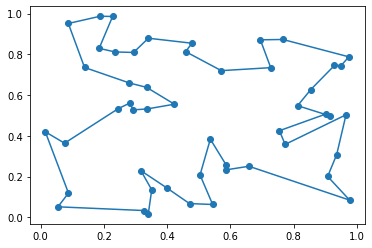

In [51]:
plt.scatter(points[:,0], points[:,1])
plt.plot(points[hof[0]][:,0], points[hof[0]][:,1])

In [52]:
print(hof[0].fitness.values[0])

6.005114049090767


## Task 2
- Pohrajte si s nastavením algoritmu pro řešení TSP (stejně jako předtím, zkustě měnit parametry a/nebo operátory z `deap`u)
- Co se stane, když zvýšíme počet vrcholů?